## Análise Estratégica de Vendas e Performance em Marketplaces

Este projeto realiza uma análise das vendas de produtos em um marketplace, com o objetivo de entender quais fatores influenciam nas vendas e fornecer insights valiosos para uma empresa que planeja revender produtos na plataforma.

https://www.kaggle.com/datasets/jmmvutu/summer-products-and-sales-in-ecommerce-wish

### Algumas das perguntas que este projeto procura responder incluem:

- Produtos com maior discrepância entre o preço de varejo e o preço de venda vendem mais?
- Ad boost impactam nas vendas?
- Avaliações positivas impulsionam as vendas?
- Quantidade de tags auxiliam vendas?
- Quais tags estão associadas a maiores vendas?
- O envio expresso impacta nas vendas?

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Carregar o arquivo CSV com informações sobre os produtos
df_products = pd.read_csv("summer-products-with-rating-and-performance_2020-08.csv")

In [8]:
# Listar todas as colunas disponíveis no DataFrame
[i for i in df_products.columns]

['title',
 'title_orig',
 'price',
 'retail_price',
 'currency_buyer',
 'units_sold',
 'uses_ad_boosts',
 'rating',
 'rating_count',
 'rating_five_count',
 'rating_four_count',
 'rating_three_count',
 'rating_two_count',
 'rating_one_count',
 'badges_count',
 'badge_local_product',
 'badge_product_quality',
 'badge_fast_shipping',
 'tags',
 'product_color',
 'product_variation_size_id',
 'product_variation_inventory',
 'shipping_option_name',
 'shipping_option_price',
 'shipping_is_express',
 'countries_shipped_to',
 'inventory_total',
 'has_urgency_banner',
 'urgency_text',
 'origin_country',
 'merchant_title',
 'merchant_name',
 'merchant_info_subtitle',
 'merchant_rating_count',
 'merchant_rating',
 'merchant_id',
 'merchant_has_profile_picture',
 'merchant_profile_picture',
 'product_url',
 'product_picture',
 'product_id',
 'theme',
 'crawl_month']

In [9]:
# Selecionar um subconjunto específico de colunas relevantes para análise
cols = [
    'title', 'price', 'retail_price', 'currency_buyer', 'units_sold',
    'uses_ad_boosts', 'rating', 'rating_count', 'badges_count',
    'badge_product_quality', 'badge_fast_shipping', 'tags',
    'product_color', 'product_variation_size_id', 'product_variation_inventory',
    'shipping_is_express', 'countries_shipped_to', 'inventory_total',
    'has_urgency_banner', 'origin_country', 'merchant_rating_count',
    'merchant_rating'
]

## 1. Análise da qualidade dos dados

In [11]:
# Seleciona apenas as coluas especificadas em `cols` no DataFrame df_products
df_products = df_products[cols]

In [12]:
# Exibe informações sobre o DataFrame df_products
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   title                        1573 non-null   object 
 1   price                        1573 non-null   float64
 2   retail_price                 1573 non-null   int64  
 3   currency_buyer               1573 non-null   object 
 4   units_sold                   1573 non-null   int64  
 5   uses_ad_boosts               1573 non-null   int64  
 6   rating                       1573 non-null   float64
 7   rating_count                 1573 non-null   int64  
 8   badges_count                 1573 non-null   int64  
 9   badge_product_quality        1573 non-null   int64  
 10  badge_fast_shipping          1573 non-null   int64  
 11  tags                         1573 non-null   object 
 12  product_color                1532 non-null   object 
 13  product_variation_

### 1.1. Análise de dados ausentes

In [14]:
# Verificando a quantidade de valores ausentes em cada coluna do DataFrame df_products
na_counts_before = df_products.isna().sum()
print("Valores ausentes antes do tratamento:")
print(na_counts_before)

Valores ausentes antes do tratamento:
title                             0
price                             0
retail_price                      0
currency_buyer                    0
units_sold                        0
uses_ad_boosts                    0
rating                            0
rating_count                      0
badges_count                      0
badge_product_quality             0
badge_fast_shipping               0
tags                              0
product_color                    41
product_variation_size_id        14
product_variation_inventory       0
shipping_is_express               0
countries_shipped_to              0
inventory_total                   0
has_urgency_banner             1100
origin_country                   17
merchant_rating_count             0
merchant_rating                   0
dtype: int64


 **Preenchendo valores ausentes nas colunas específicas**

In [16]:
# Substitui valores ausentes na coluna 'product_color' por uma string vazia
df_products.loc[df_products["product_color"].isna(), "product_color"] = ""

# Substitui valores ausentes na coluna 'product_variation_size_id' por uma string vazia
df_products.loc[df_products["product_variation_size_id"].isna(), "product_variation_size_id"] = ""

# Substitui valores ausentes na coluna 'has_urgency_banner' por 0
df_products.loc[df_products["has_urgency_banner"].isna(), "has_urgency_banner"] = 0

# Substitui valores ausentes na coluna 'origin_country' por uma string vazia
df_products.loc[df_products["origin_country"].isna(), "origin_country"] = ""

In [17]:
# Verificando novamente a quantidade de valores ausentes em cada coluna após o tratamento
na_counts_after = df_products.isna().sum()
print("Valores ausentes após o tratamento:")
print(na_counts_after)

Valores ausentes após o tratamento:
title                          0
price                          0
retail_price                   0
currency_buyer                 0
units_sold                     0
uses_ad_boosts                 0
rating                         0
rating_count                   0
badges_count                   0
badge_product_quality          0
badge_fast_shipping            0
tags                           0
product_color                  0
product_variation_size_id      0
product_variation_inventory    0
shipping_is_express            0
countries_shipped_to           0
inventory_total                0
has_urgency_banner             0
origin_country                 0
merchant_rating_count          0
merchant_rating                0
dtype: int64


### 1.2. Qual das colunas são categóricas e quais são numéricas?

In [19]:
# Gera estatísticas descritivas para o DataFrame df_products
df_products.describe()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1.573000e+03,1573.000000
mean,8.325372,23.288620,4339.005086,0.432931,3.820896,889.659250,0.105531,0.074380,0.012715,33.081373,0.002543,40.456453,49.821360,0.300699,2.649583e+04,4.032345
std,3.932030,30.357863,9356.539302,0.495639,0.515374,1983.928834,0.340709,0.262472,0.112075,21.353137,0.050379,20.301203,2.562799,0.458708,7.847446e+04,0.204768
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,6.000000,1.000000,0.000000,0.000000e+00,2.333333
25%,5.810000,7.000000,100.000000,0.000000,3.550000,24.000000,0.000000,0.000000,0.000000,6.000000,0.000000,31.000000,50.000000,0.000000,1.987000e+03,3.917353
50%,8.000000,10.000000,1000.000000,0.000000,3.850000,150.000000,0.000000,0.000000,0.000000,50.000000,0.000000,40.000000,50.000000,0.000000,7.936000e+03,4.040650
75%,11.000000,26.000000,5000.000000,1.000000,4.110000,855.000000,0.000000,0.000000,0.000000,50.000000,0.000000,43.000000,50.000000,1.000000,2.456400e+04,4.161797
max,49.000000,252.000000,100000.000000,1.000000,5.000000,20744.000000,3.000000,1.000000,1.000000,50.000000,1.000000,140.000000,50.000000,1.000000,2.174765e+06,5.000000


In [20]:
# Colunas categóricas são aquelas que não estão presentes nas estatísticas descritivas
categorical_cols = [i for i in cols if i not in df_products.describe().columns]

# Colunas numéricas são aquelas que estão presentes nas estatísticas descritivas
numerical_cols = df_products.describe().columns

# Exibe as colunas categóricas
print("Colunas Categóricas:")
print(categorical_cols)

# Exibe as colunas numéricas
print("\nColunas Numéricas:")
print(numerical_cols)

Colunas Categóricas:
['title', 'currency_buyer', 'tags', 'product_color', 'product_variation_size_id', 'origin_country']

Colunas Numéricas:
Index(['price', 'retail_price', 'units_sold', 'uses_ad_boosts', 'rating',
       'rating_count', 'badges_count', 'badge_product_quality',
       'badge_fast_shipping', 'product_variation_inventory',
       'shipping_is_express', 'countries_shipped_to', 'inventory_total',
       'has_urgency_banner', 'merchant_rating_count', 'merchant_rating'],
      dtype='object')


## 2. Análise Exploratória 

### 2.1. Exploração da Distribuição dos Dados

##### 2.1.1. Dados categóricos

In [24]:
# Exibe as colunas categóricas
print("Colunas Categóricas:")
print(categorical_cols)

Colunas Categóricas:
['title', 'currency_buyer', 'tags', 'product_color', 'product_variation_size_id', 'origin_country']


In [25]:
# Exibe as primeiras linhas da coluna "tags" para entender seu conteúdo
print("\nPrimeiras linhas da coluna 'tags':")
print(df_products["tags"].head())


Primeiras linhas da coluna 'tags':
0    Summer,Fashion,womenunderwearsuit,printedpajam...
1    Mini,womens dresses,Summer,Patchwork,fashion d...
2    Summer,cardigan,women beachwear,chiffon,Sexy w...
3    Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...
4    Summer,Plus Size,Lace,Casual pants,Bottom,pant...
Name: tags, dtype: object


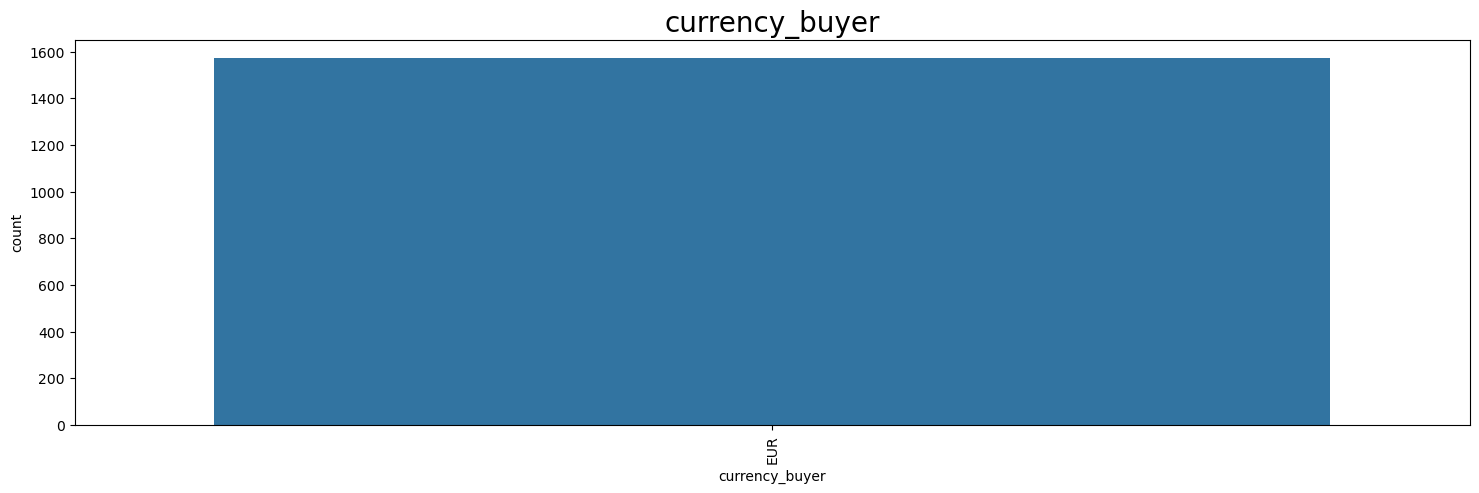

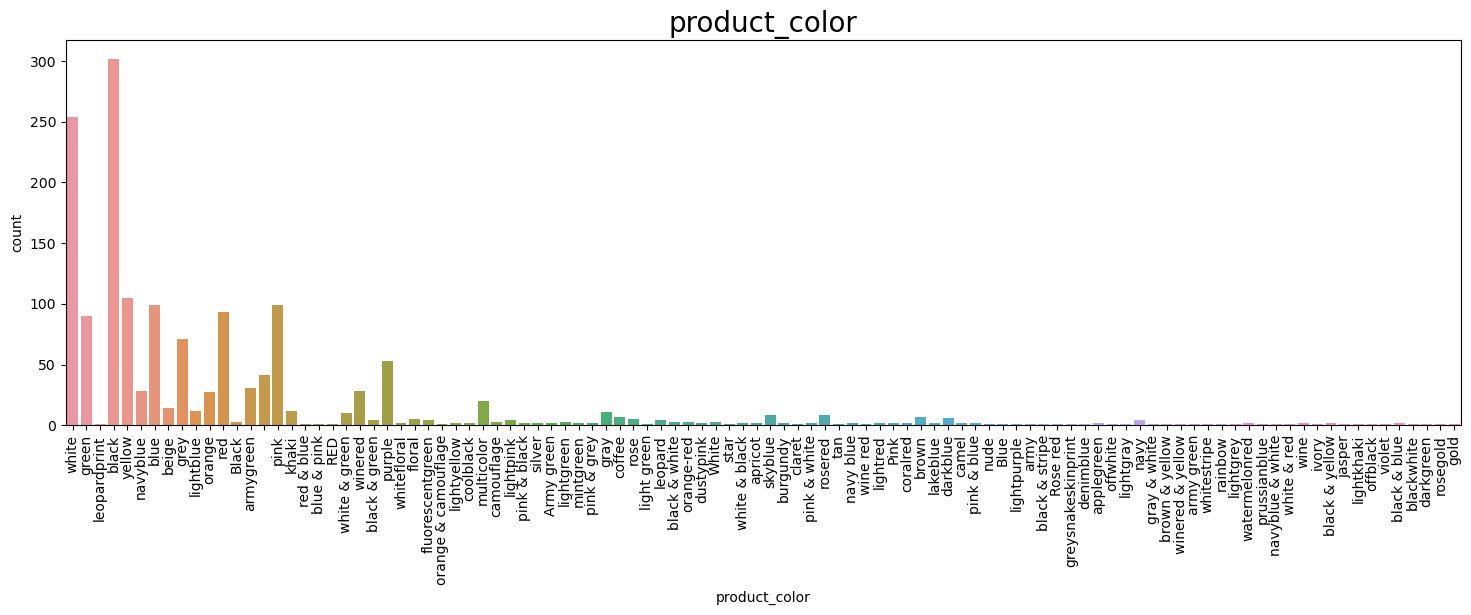

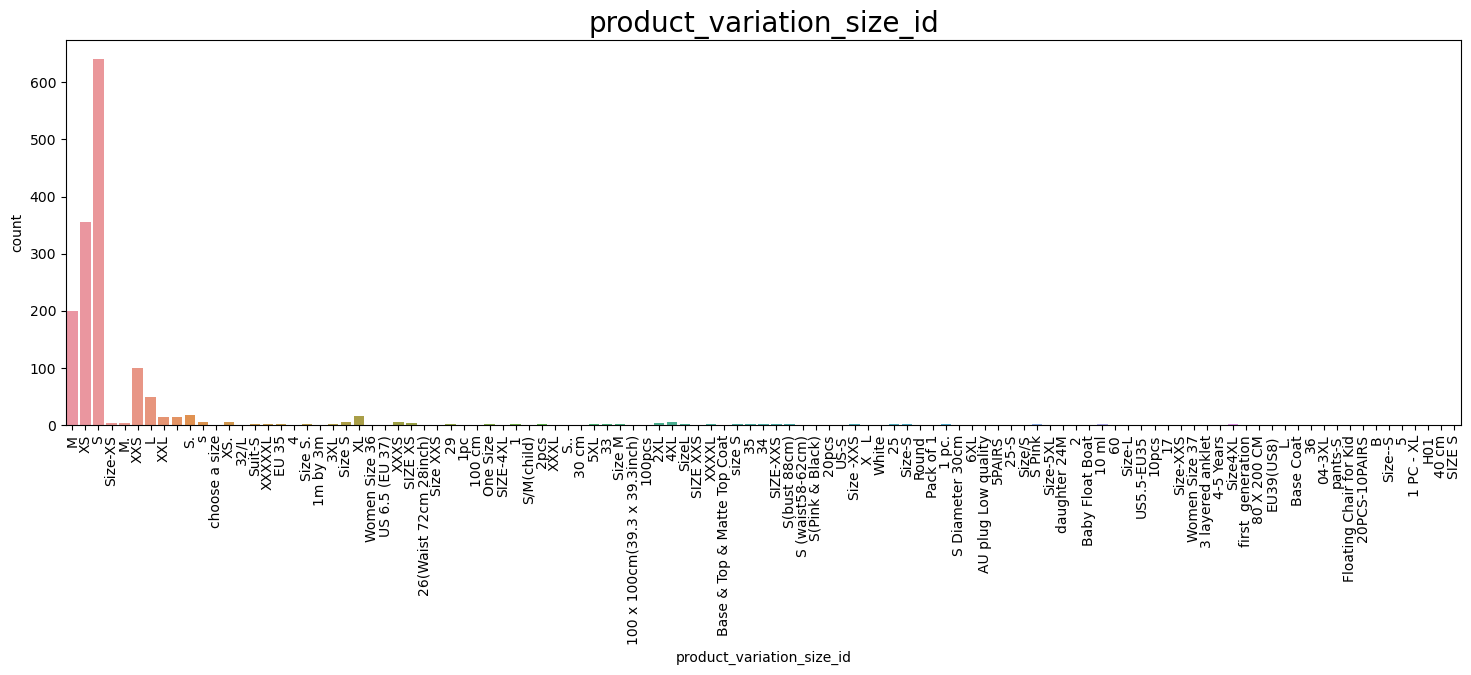

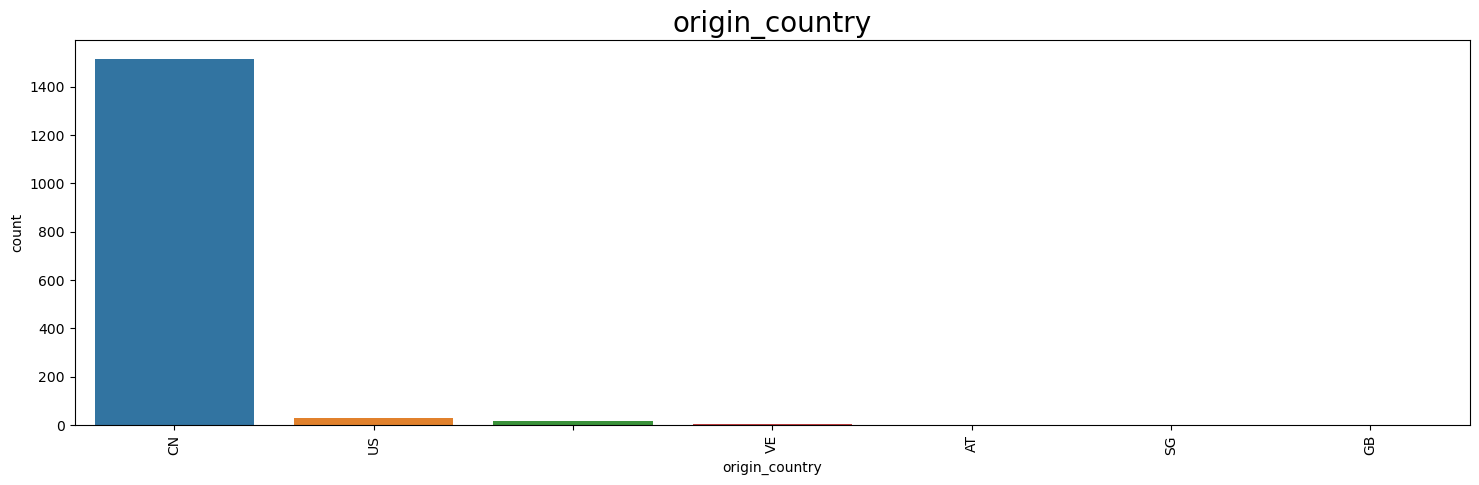

In [26]:
# Plota gráficos de contagem para cada coluna categórica, exceto "title" e "tags"
for col in categorical_cols:
    if col not in ["title", "tags"]:
        plt.figure(figsize=(18, 5))
        sns.countplot(x=col, data=df_products)
        plt.xticks(rotation=90)
        plt.title(col, fontsize=20)
        plt.show()

#### 2.1.2. Dados numéricos

In [28]:
# Exibe as colunas numéricas
print("Colunas Numéricas:")
print(numerical_cols)

Colunas Numéricas:
Index(['price', 'retail_price', 'units_sold', 'uses_ad_boosts', 'rating',
       'rating_count', 'badges_count', 'badge_product_quality',
       'badge_fast_shipping', 'product_variation_inventory',
       'shipping_is_express', 'countries_shipped_to', 'inventory_total',
       'has_urgency_banner', 'merchant_rating_count', 'merchant_rating'],
      dtype='object')


C:\Users\renat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


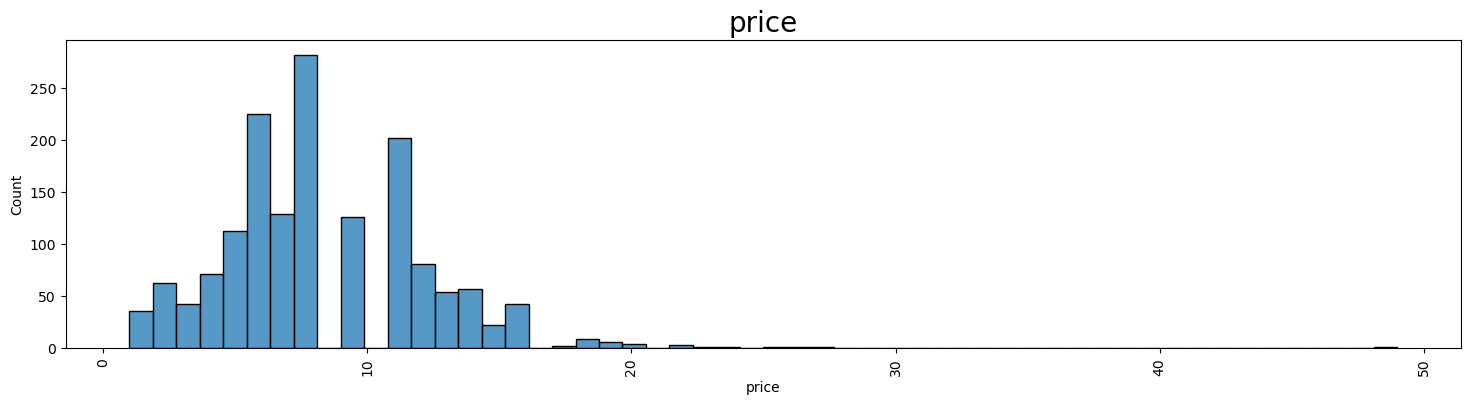

C:\Users\renat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


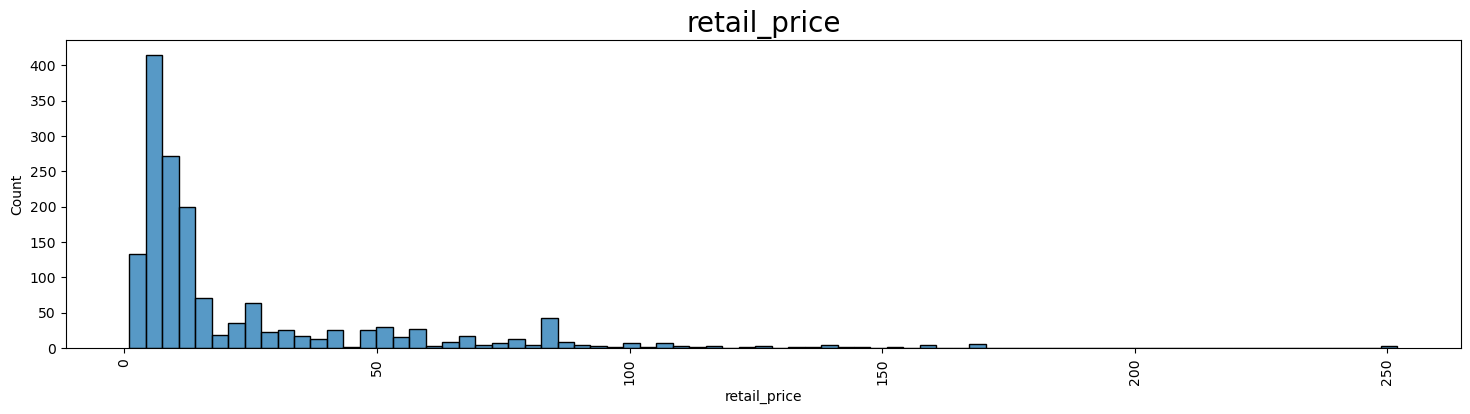

C:\Users\renat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


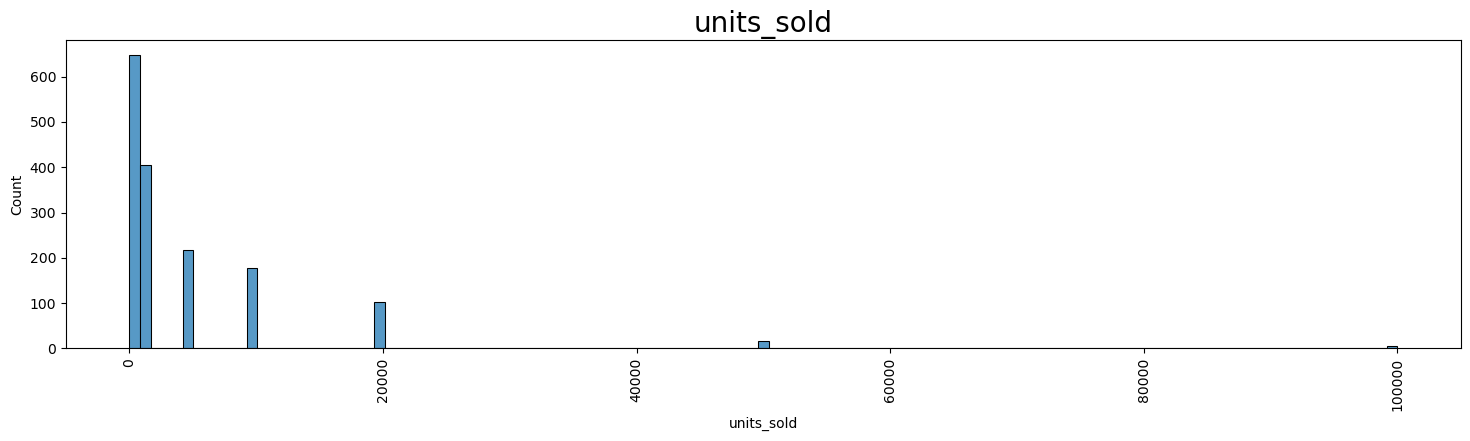

C:\Users\renat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


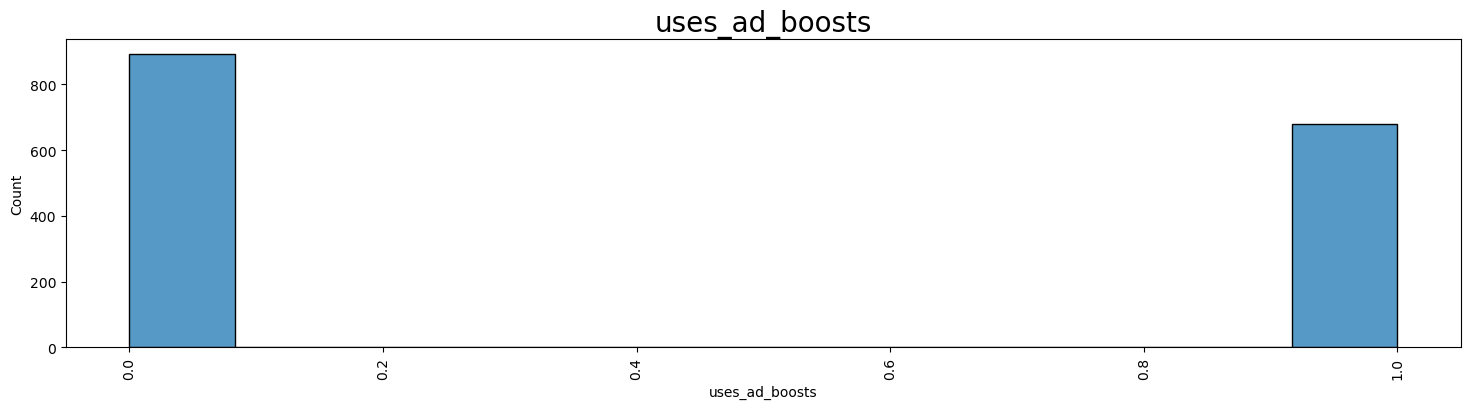

C:\Users\renat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


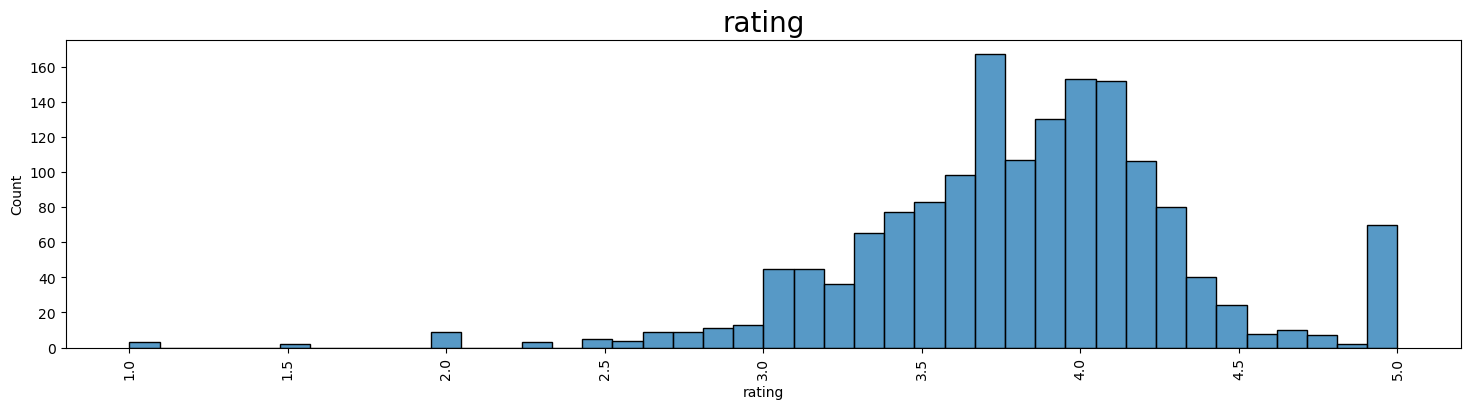

C:\Users\renat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


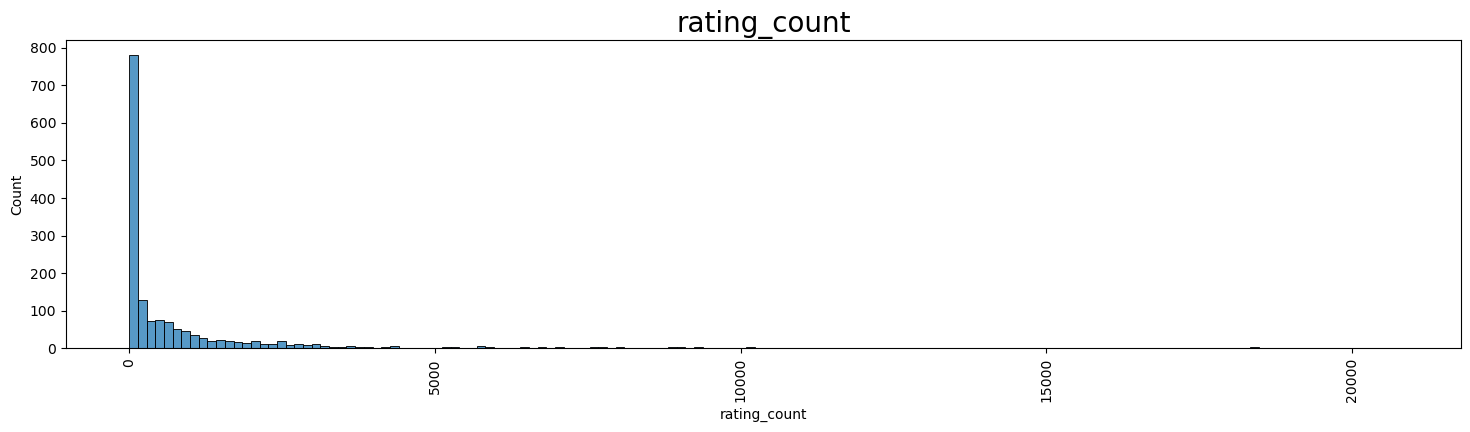

C:\Users\renat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


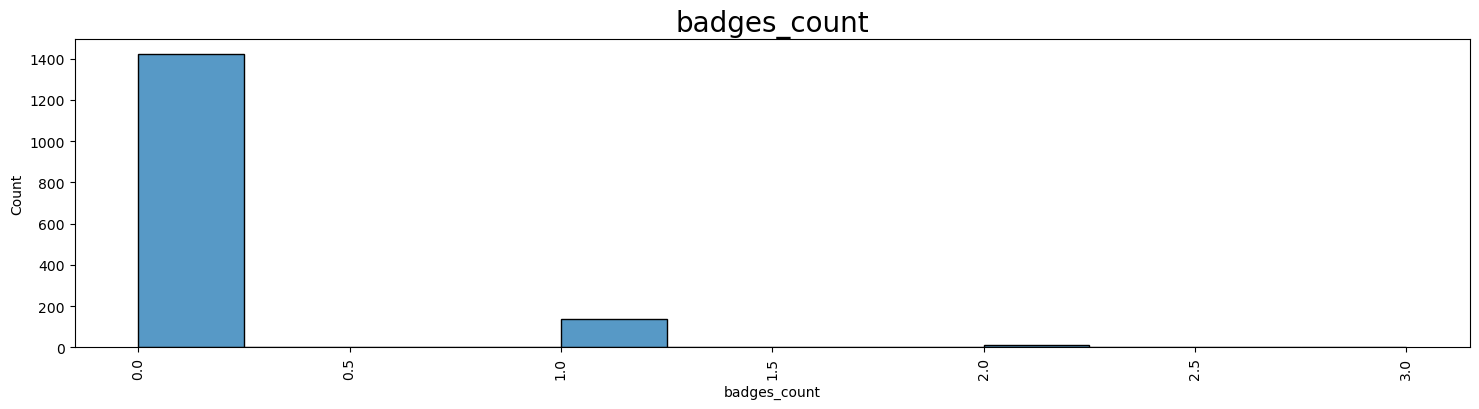

C:\Users\renat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


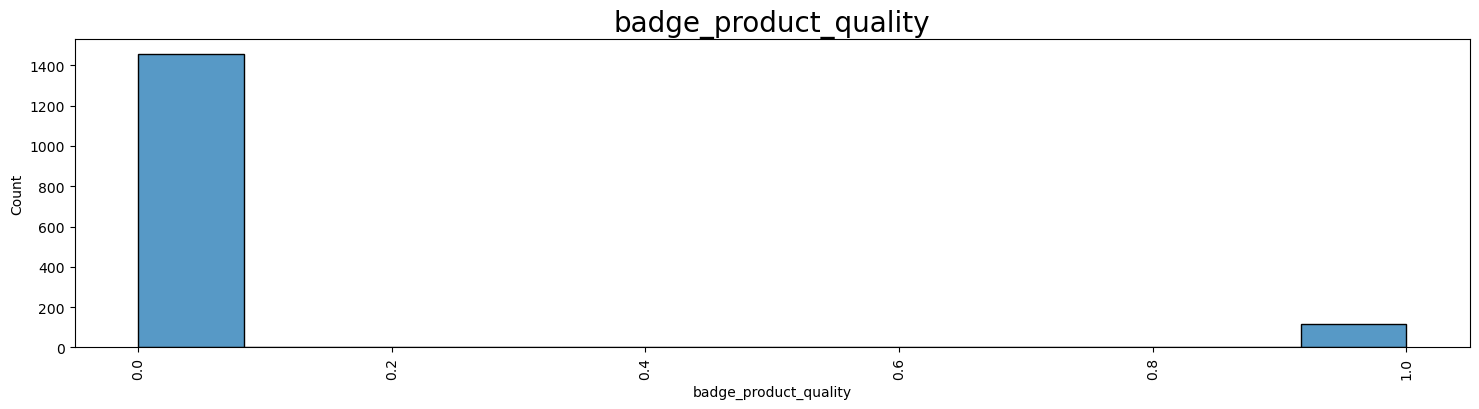

C:\Users\renat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


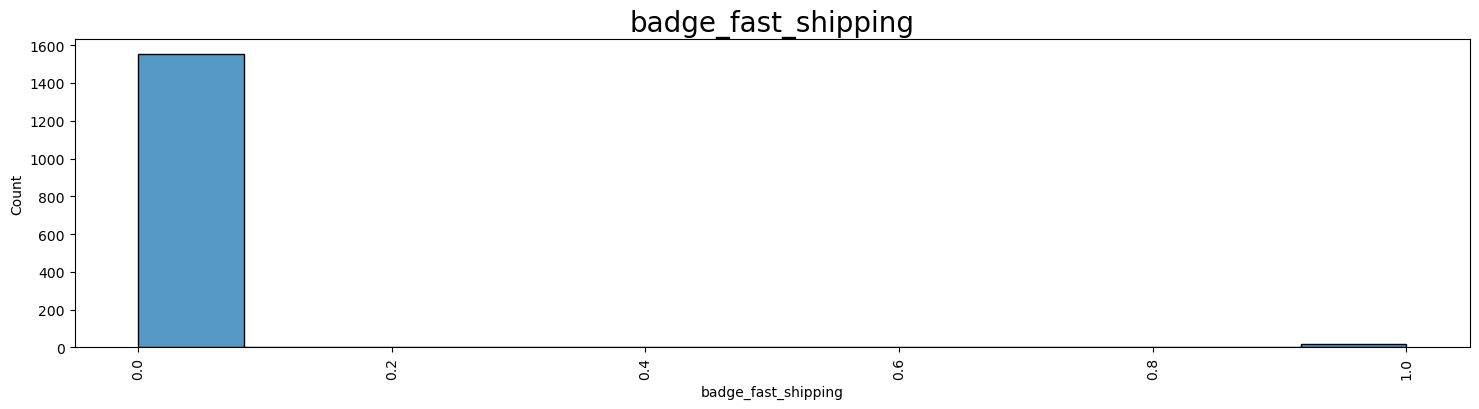

C:\Users\renat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


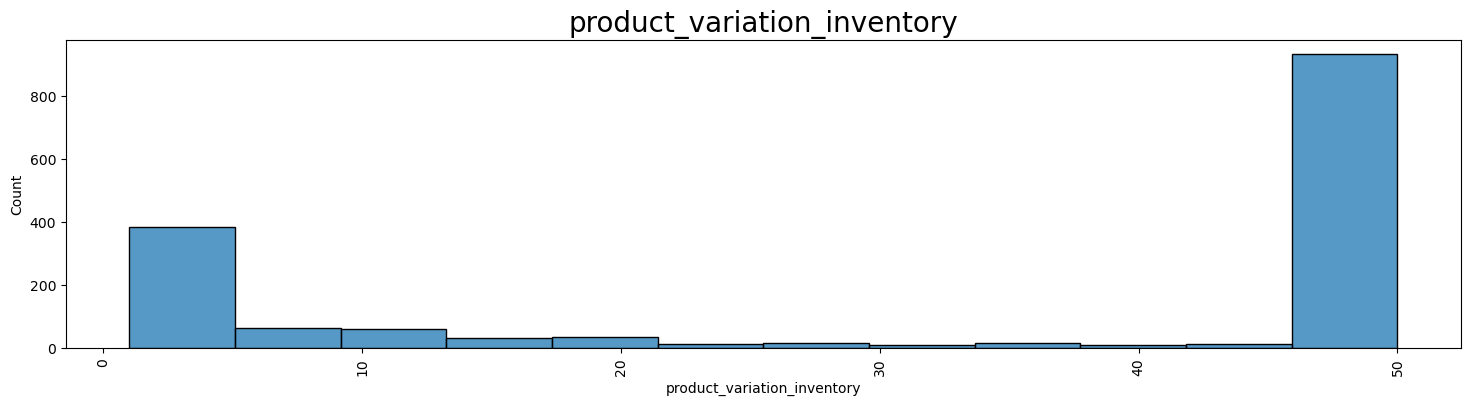

C:\Users\renat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


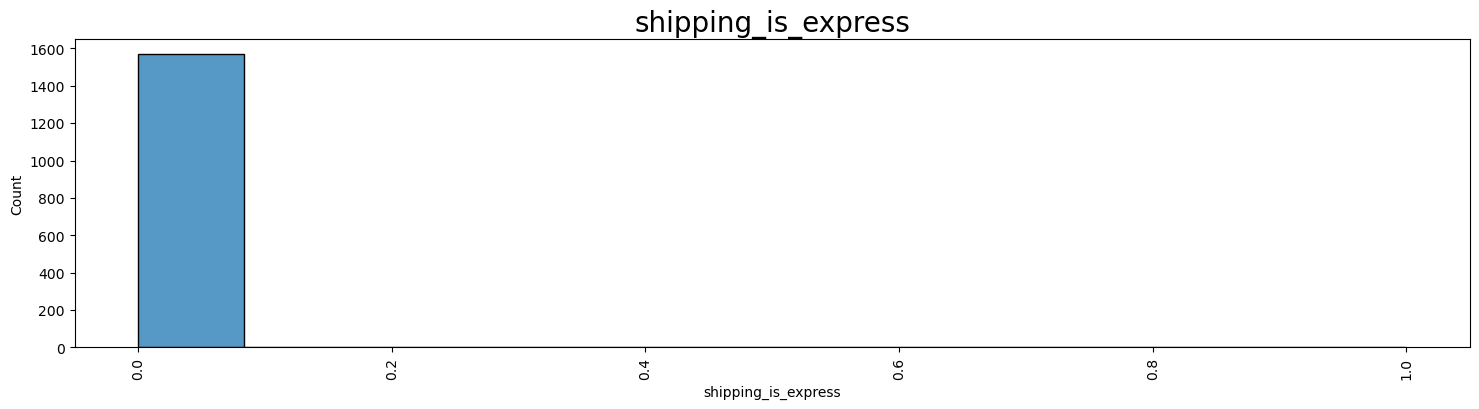

C:\Users\renat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


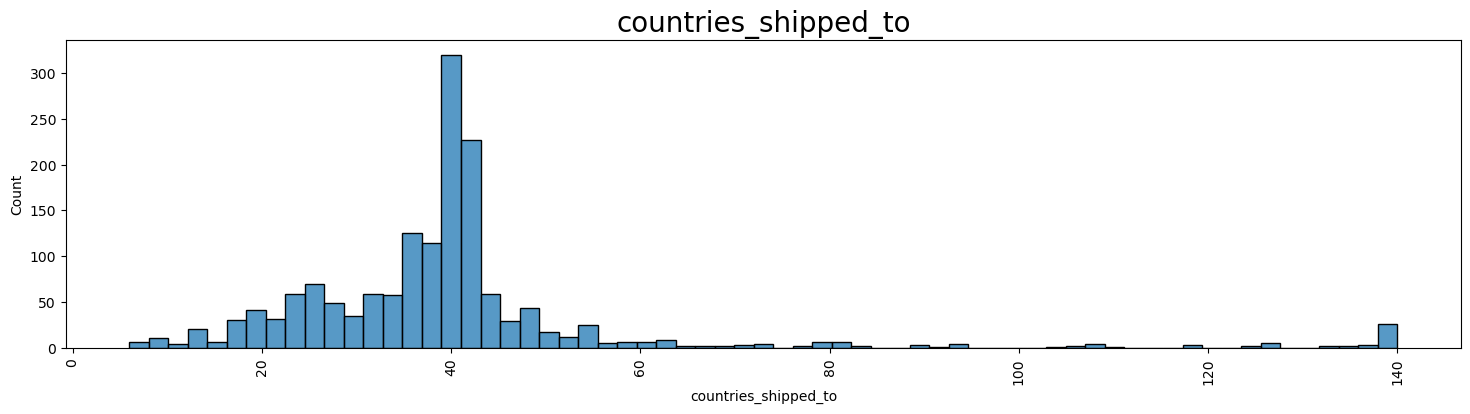

C:\Users\renat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


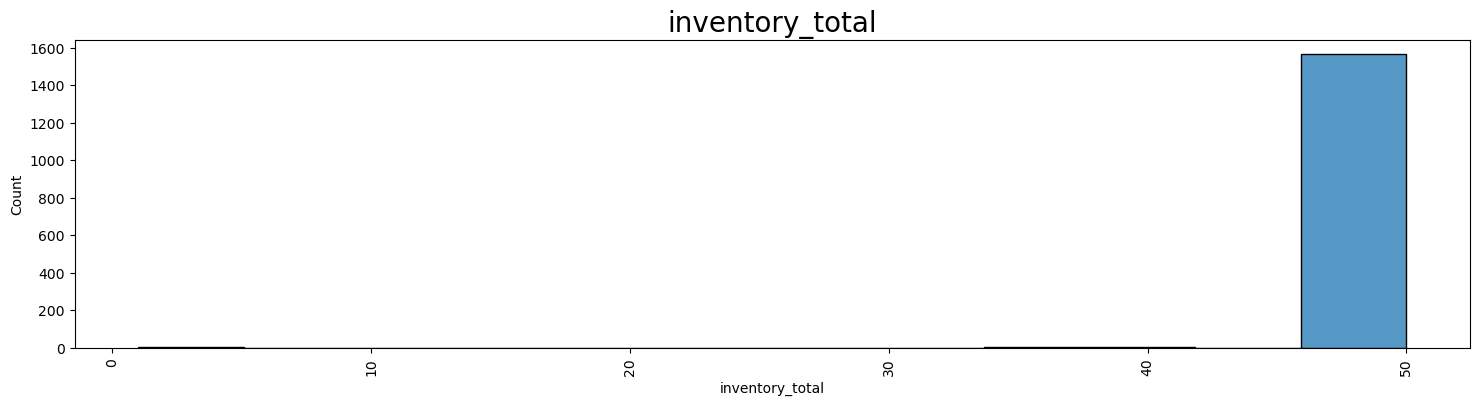

C:\Users\renat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


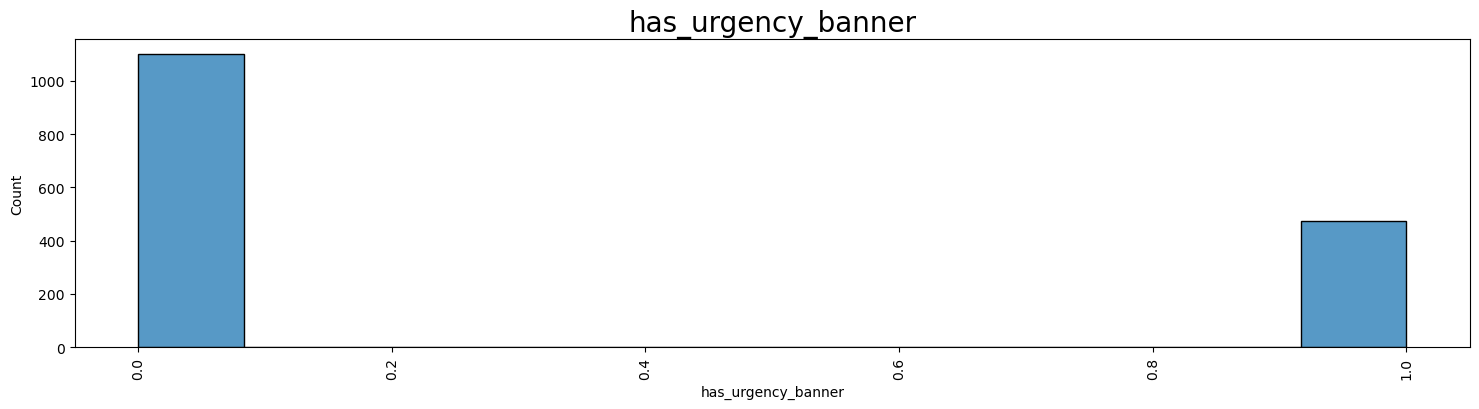

C:\Users\renat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


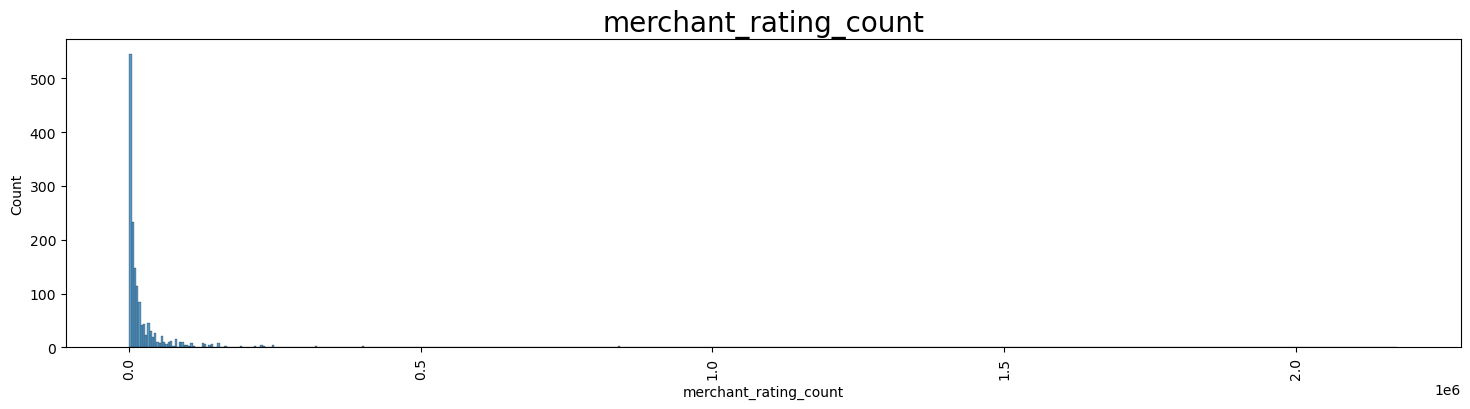

C:\Users\renat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


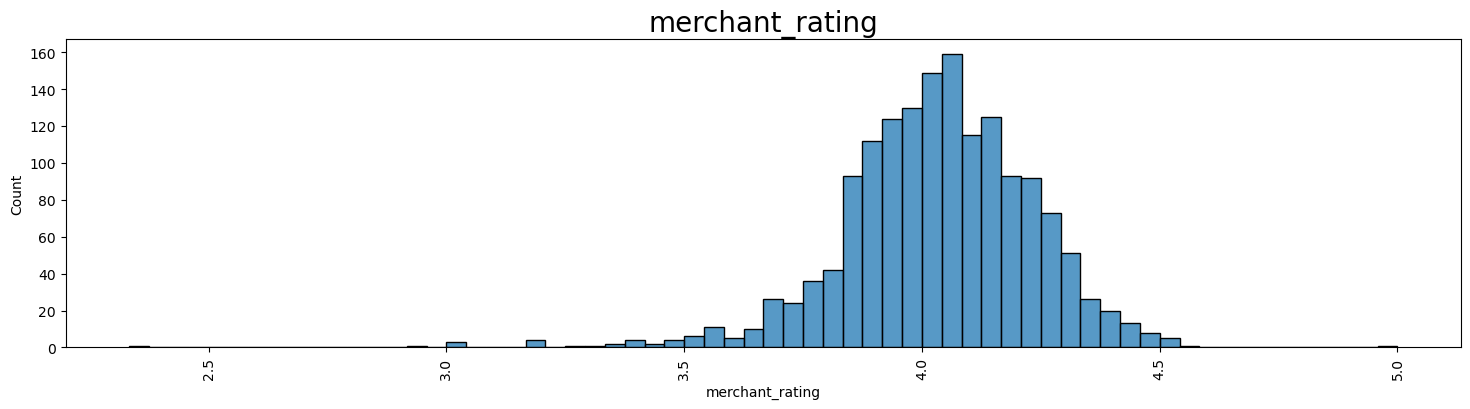

In [29]:
# Plota histogramas para cada coluna numérica
for col in numerical_cols:
    plt.figure(figsize=(18, 4))
    sns.histplot(x=col, data=df_products)
    plt.xticks(rotation=90)
    plt.title(col, fontsize=20)
    plt.show()

A coluna "units_sold" precisará de uma correção.

#### 2.1.3. Ajuste fino das colunas "tag" e "units sold"

**Units_sold**

In [33]:
# Exibe contagem de valores da coluna 'units_sold'
print("Contagem de valores da coluna 'units_sold':")
print(df_products["units_sold"].value_counts())

Contagem de valores da coluna 'units_sold':
units_sold
100       509
1000      405
5000      217
10000     177
20000     103
50         76
10         49
50000      17
100000      6
8           4
1           3
7           2
2           2
3           2
6           1
Name: count, dtype: int64


In [34]:
# Visualiza o DataFrame df_products
print("\nDataFrame df_products:")
print(df_products)


DataFrame df_products:
                                                  title  price  retail_price  \
0     2020 Summer Vintage Flamingo Print  Pajamas Se...  16.00            14   
1     SSHOUSE Summer Casual Sleeveless Soirée Party ...   8.00            22   
2     2020 Nouvelle Arrivée Femmes Printemps et Été ...   8.00            43   
3     Hot Summer Cool T-shirt pour les femmes Mode T...   8.00             8   
4     Femmes Shorts d'été à lacets taille élastique ...   2.72             3   
...                                                 ...    ...           ...   
1568  Nouvelle Mode Femmes Bohême Pissenlit Imprimer...   6.00             9   
1569  10 couleurs femmes shorts d'été lacent ceintur...   2.00            56   
1570  Nouveautés Hommes Siwmwear Beach-Shorts Hommes...   5.00            19   
1571  Mode femmes d'été sans manches robes col en V ...  13.00            11   
1572  Pantalon de yoga pour femmes à la mode Slim Fi...   7.00             6   

     currency_b

In [35]:
# Define um valor mínimo de 10 para unidades vendidas onde for menor que 10
df_products.loc[df_products["units_sold"] < 10, "units_sold"] = 10

# Exibe contagem de valores da coluna 'units_sold'
print("Contagem de valores da coluna 'units_sold':")
print(df_products["units_sold"].value_counts())

Contagem de valores da coluna 'units_sold':
units_sold
100       509
1000      405
5000      217
10000     177
20000     103
50         76
10         63
50000      17
100000      6
Name: count, dtype: int64


In [36]:
# Calcula a mediana da coluna 'units_sold'
median_units_sold = df_products["units_sold"].median()
print(f"\nMediana da coluna 'units_sold': {median_units_sold}")


Mediana da coluna 'units_sold': 1000.0


In [37]:
# Calcula a média da coluna 'units_sold'
mean_units_sold = df_products["units_sold"].mean()
print(f"Média da coluna 'units_sold': {mean_units_sold}")

Média da coluna 'units_sold': 4339.052765416402


A mediana das vendas é 1000, logo é preciso tentar entender que produtos ficaram acima desse patamar e quais ficaram abaixo.

**Tag**

In [40]:
from wordcloud import WordCloud, STOPWORDS

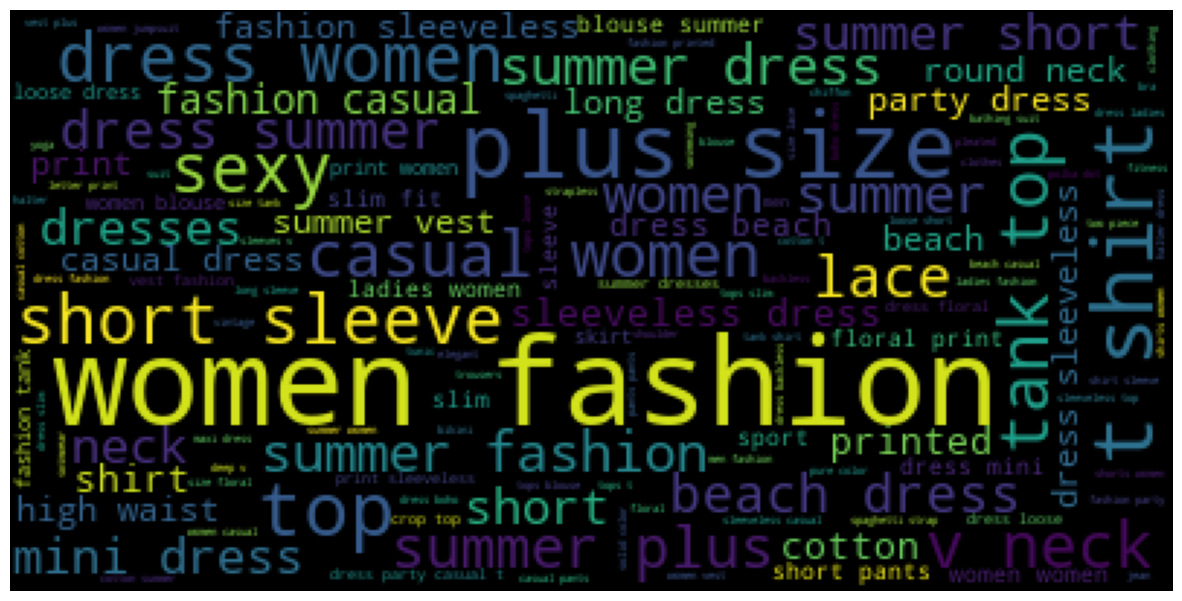

In [41]:
# Cria nuvem de palavras para a coluna 'tags'
word_string = " ".join(df_products['tags'].str.lower())
wordcloud = WordCloud(stopwords=STOPWORDS).generate(word_string)

# Plota a nuvem de palavras
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### 2.2. Análise de produtos "Líderes"

In [43]:
# Calcula a receita total de cada produto
df_products["income"] = df_products["price"] * df_products["units_sold"]

C:\Users\renat\AppData\Local\Temp\ipykernel_8900\3657416464.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_products["income"])
C:\Users\renat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='income', ylabel='Density'>

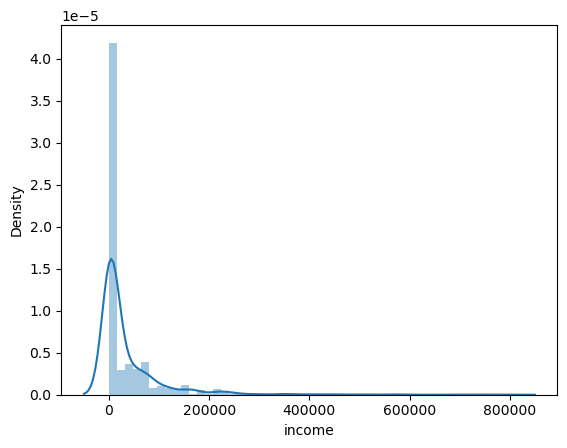

In [44]:
# Plot da distribuição da receita
sns.distplot(df_products["income"])

In [45]:
import numpy as np

# Imprime os quantis da receita
for i in np.linspace(0, 1, 10):
    print("{:.2f} - {:.2f}".format(i, df_products["income"].quantile(i)))

0.00 - 20.00
0.11 - 369.00
0.22 - 700.00
0.33 - 1100.00
0.44 - 5000.00
0.56 - 8000.00
0.67 - 16000.00
0.78 - 49800.00
0.89 - 90000.00
1.00 - 800000.00


In [46]:
# Calcula a mediana da receita
df_products["income"].median()

7000.0

In [47]:
# Calcula a média da receita
df_products["income"].mean()

35211.941703750796

Existe uma diferença entre a média e a mediana quando a distribuição da variável observada não segue uma normal. 
Portanto, vale a pena basearmos nossas análises na mediana.
Agora, analisar produtos com faturamento acima de $7.000.

In [49]:
# Marca produtos como bem sucedidos se a receita for maior que 7000
df_products["success"] = 0
df_products.loc[df_products["income"] > 7000, "success"] = 1

#### Produtos com maior discrepância entre o preço de varejo e o preço de venda vendem mais?

In [51]:
# Calcula o desconto de cada produto
df_products["discount"] = df_products["retail_price"] - df_products["price"]

C:\Users\renat\AppData\Local\Temp\ipykernel_8900\2666549067.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_products.loc[df_products["success"] == 1, "discount"], label="Success = 1")
C:\Users\renat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\renat\AppData\Local\Temp\ipykernel_8900\2666549067.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use eit

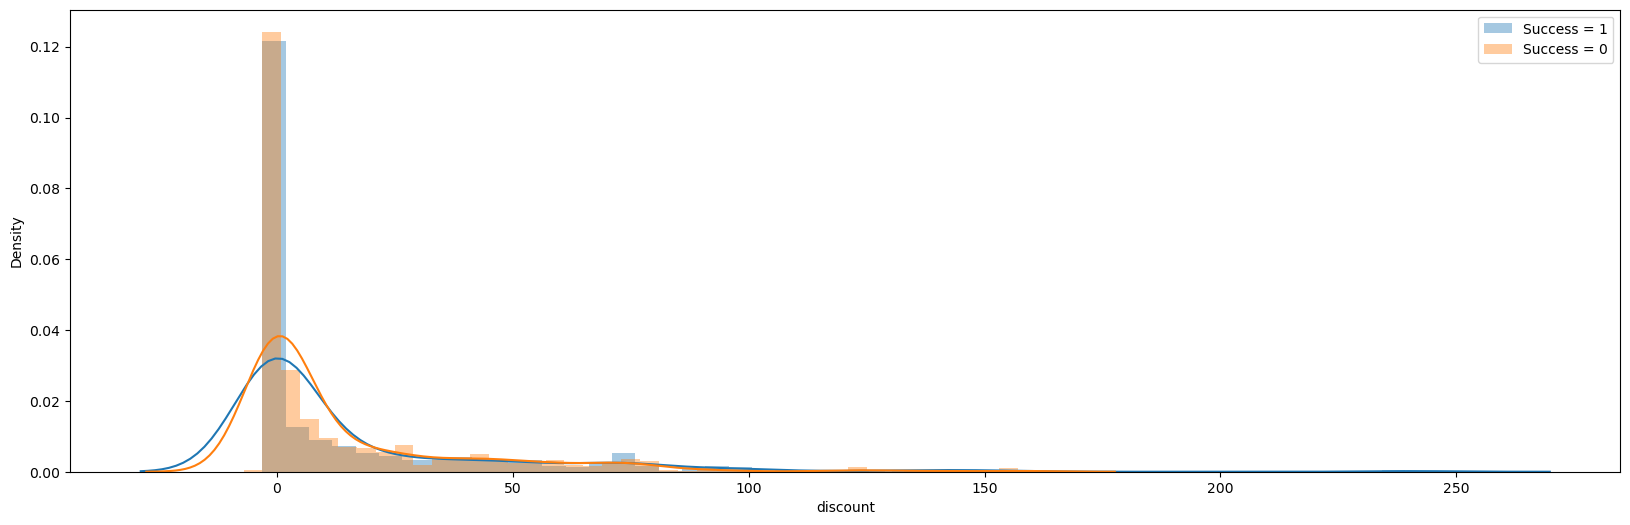

In [52]:
# Plot da distribuição de descontos separados por sucesso do produto
fig, ax = plt.subplots(figsize=(20, 6))
sns.distplot(df_products.loc[df_products["success"] == 1, "discount"], label="Success = 1")
sns.distplot(df_products.loc[df_products["success"] == 0, "discount"], label="Success = 0")
plt.legend()

#### Ad boost impactam nas vendas?

In [54]:
# Exibe as primeiras linhas do DataFrame para visualização inicial
df_products.head(1)

,title,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_product_quality,...,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,origin_country,merchant_rating_count,merchant_rating,income,success,discount
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.0,14,EUR,100,0,3.76,54,0,0,...,0,34,50,1.0,CN,568,4.128521,1600.0,0,-2.0


In [55]:
# Calcula a proporção de produtos que usam ad boosts entre os não bem sucedidos
df_products.loc[df_products["success"] == 0, "uses_ad_boosts"].value_counts() / df_products.loc[df_products["success"] == 0, "uses_ad_boosts"].value_counts().sum()

uses_ad_boosts
0    0.545117
1    0.454883
Name: count, dtype: float64

In [56]:
# Calcula a proporção de produtos que usam ad boosts entre os bem sucedidos
df_products.loc[df_products["success"] == 1, "uses_ad_boosts"].value_counts() / df_products.loc[df_products["success"] == 1, "uses_ad_boosts"].value_counts().sum()

uses_ad_boosts
0    0.590314
1    0.409686
Name: count, dtype: float64

#### Avaliações positivas impulsionam as vendas?

C:\Users\renat\AppData\Local\Temp\ipykernel_8900\3257500393.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_products.loc[df_products["success"] == 1, "rating"], label="Success = 1")
C:\Users\renat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\renat\AppData\Local\Temp\ipykernel_8900\3257500393.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use eithe

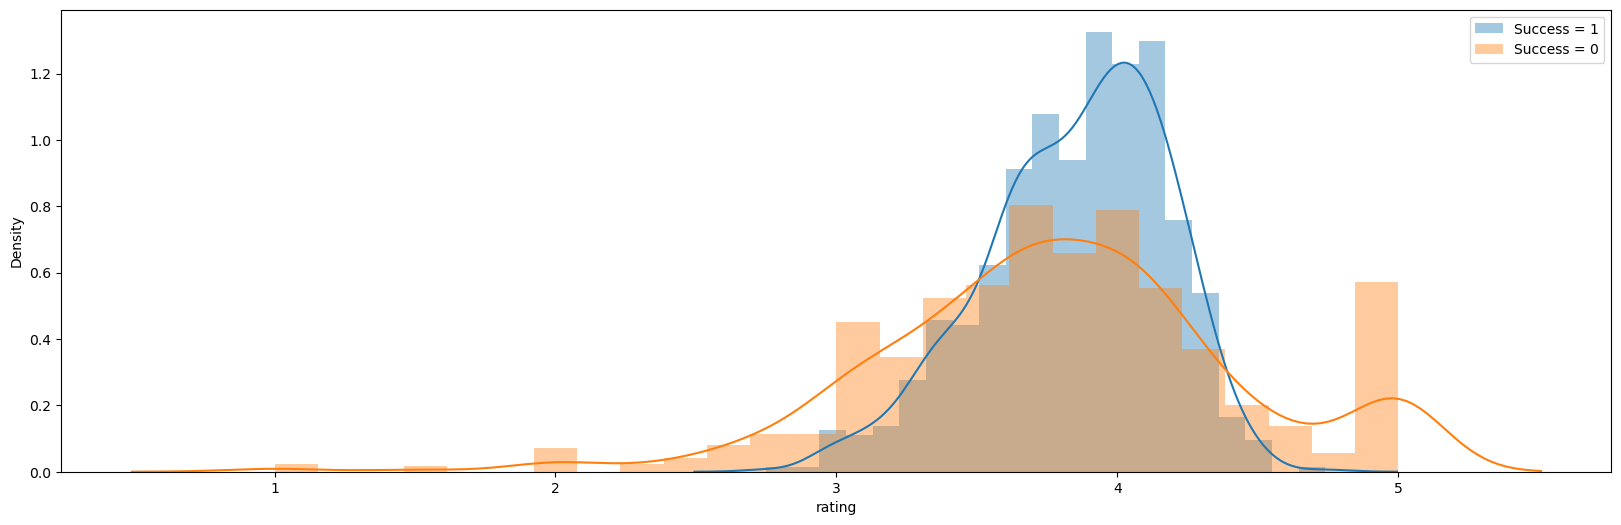

In [58]:
# Plot da distribuição de ratings separados por sucesso do produto
fig, ax = plt.subplots(figsize=(20, 6))
sns.distplot(df_products.loc[df_products["success"] == 1, "rating"], label="Success = 1")
sns.distplot(df_products.loc[df_products["success"] == 0, "rating"], label="Success = 0")
plt.legend()

In [59]:
# Calcula a mediana dos ratings entre os produtos bem sucedidos
df_products.loc[df_products["success"] == 1, "rating"].median()

3.9

In [60]:
# Calcula a mediana dos ratings entre os produtos não bem sucedidos
df_products.loc[df_products["success"] == 0, "rating"].median()

3.78

#### Badges são relevantes?

In [62]:
# Tabelas pivot para contar a quantidade de produtos por combinação de sucesso e número de badges
df_products.groupby(["success", "badges_count"]).count()[["title"]].pivot_table(index="success", columns="badges_count").fillna(0)

title                
badges_count      0     1    2    3
success                            
0             753.0  48.0  8.0  0.0
1             669.0  90.0  3.0  2.0

In [63]:
# Tabelas pivot para contar a quantidade de produtos por combinação de sucesso e qualidade de badge
df_products.groupby(["success", "badge_product_quality"]).count()[["title"]].pivot_table(index="success", columns="badge_product_quality").fillna(0)

title      
badge_product_quality      0     1
success                           
0                      770.0  39.0
1                      686.0  78.0

In [64]:
# Tabelas pivot para contar a quantidade de produtos por combinação de sucesso e rapidez de envio badge
df_products.groupby(["success", "badge_fast_shipping"]).count()[["title"]].pivot_table(index="success", columns="badge_fast_shipping").fillna(0)

title      
badge_fast_shipping      0     1
success                         
0                    795.0  14.0
1                    758.0   6.0

#### Quantidade de tags auxiliam vendas?

In [66]:
# Contagem de tags
df_products["tags"]

0       Summer,Fashion,womenunderwearsuit,printedpajam...
1       Mini,womens dresses,Summer,Patchwork,fashion d...
2       Summer,cardigan,women beachwear,chiffon,Sexy w...
3       Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...
4       Summer,Plus Size,Lace,Casual pants,Bottom,pant...
                              ...                        
1568    bohemia,Plus Size,dandelionfloralprinted,short...
1569    Summer,Panties,Elastic,Lace,Casual pants,casua...
1570    runningshort,Beach Shorts,beachpant,menbeachsh...
1571    Summer,fashion women,Fashion,Lace,Dresses,Dres...
1572    Summer,Leggings,slim,Yoga,pants,Slim Fit,Women...
Name: tags, Length: 1573, dtype: object

In [67]:
# Contagem de tags por produto
df_products["tags_count"] = df_products["tags"].apply(lambda x: len(x.split(',')))

In [68]:
# Cálculo do desconto por produto
df_products["discount"] = df_products["retail_price"] - df_products["price"]

C:\Users\renat\AppData\Local\Temp\ipykernel_8900\380678520.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_products.loc[df_products["success"] == 1, "tags_count"], label="Success = 1")
C:\Users\renat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\renat\AppData\Local\Temp\ipykernel_8900\380678520.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use eit

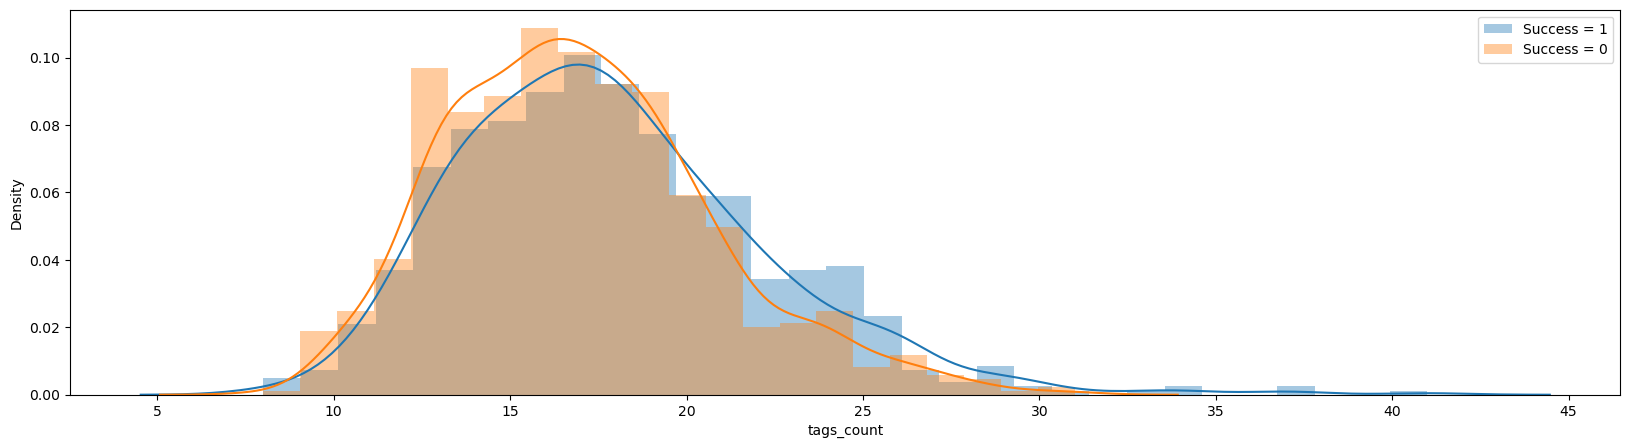

In [69]:
# Plot da distribuição de tags_count separados por sucesso do produto
fig, ax = plt.subplots(figsize=(20, 5))
sns.distplot(df_products.loc[df_products["success"] == 1, "tags_count"], label="Success = 1")
sns.distplot(df_products.loc[df_products["success"] == 0, "tags_count"], label="Success = 0")
plt.legend()

#### Quais tags estão associadas a maiores vendas?

In [71]:
# Criação de nuvens de palavras para tags de produtos bem sucedidos e não bem sucedidos
df_success_tags = df_products.loc[df_products["success"] == 1]
word_string_success = " ".join(df_success_tags['tags'].str.lower())
wordcloud_success = WordCloud(stopwords=STOPWORDS).generate(word_string_success)

df_fail_tags = df_products.loc[df_products["success"] == 0]
word_string_fail = " ".join(df_fail_tags['tags'].str.lower())
wordcloud_fail = WordCloud(stopwords=STOPWORDS).generate(word_string_fail)

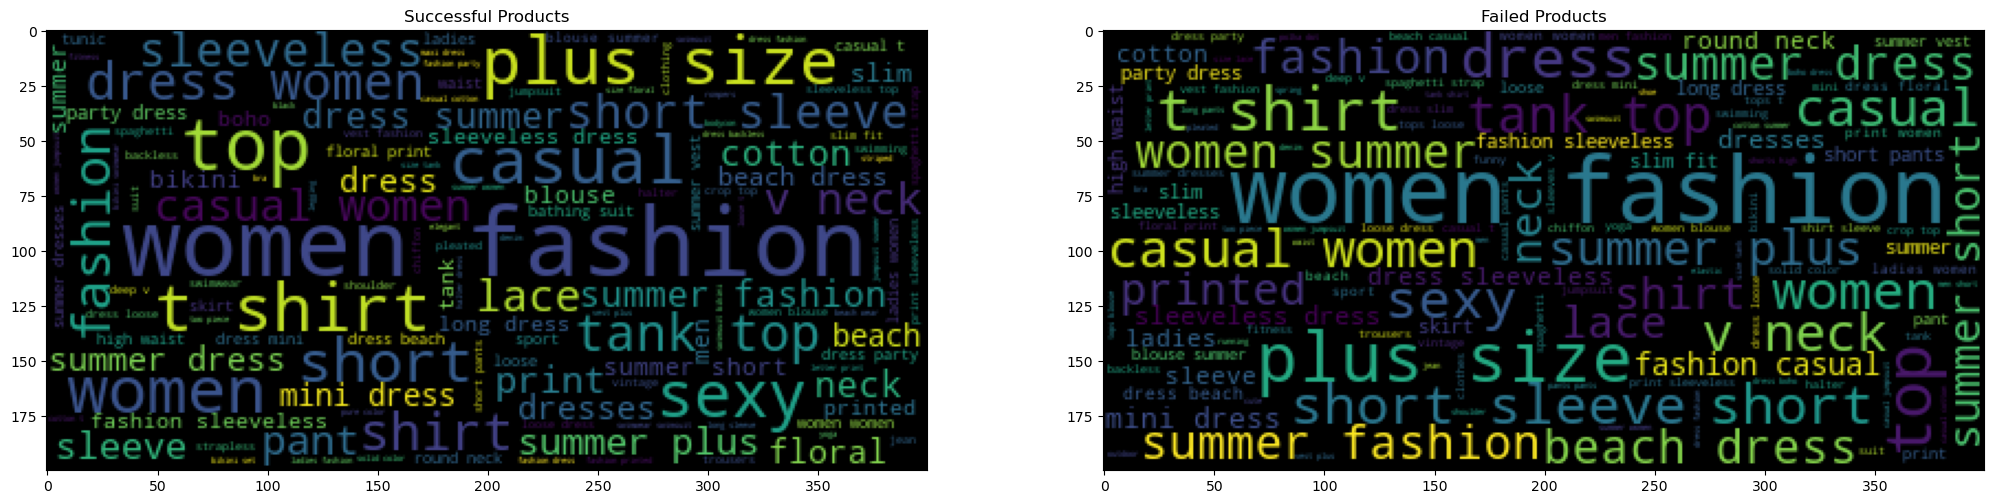

In [72]:
# Plot das nuvens de palavras
fig, ax = plt.subplots(1, 2, figsize=(25, 20))
ax[0].imshow(wordcloud_success)
ax[0].set_title('Successful Products')
ax[1].imshow(wordcloud_fail)
ax[1].set_title('Failed Products')
plt.show()

#### O envio expresso impacta nas vendas?

In [74]:
from scipy.stats import ttest_ind

# 1. Distribuição de Produtos com e sem Envio Expresso
express_counts = df_products['shipping_is_express'].value_counts()
print("Distribuição de Produtos com e sem Envio Expresso:")
print(express_counts)

Distribuição de Produtos com e sem Envio Expresso:
shipping_is_express
0    1569
1       4
Name: count, dtype: int64


In [75]:
# 2. Comparação de Unidades Vendidas
mean_units_sold_express = df_products.groupby('shipping_is_express')['units_sold'].mean()
print("\nMédia de Unidades Vendidas por Tipo de Envio:")
print(mean_units_sold_express)


Média de Unidades Vendidas por Tipo de Envio:
shipping_is_express
0    4342.976418
1    2800.000000
Name: units_sold, dtype: float64


In [76]:
# 3. Teste Estatístico
express_units_sold = df_products[df_products['shipping_is_express'] == 1]['units_sold']
non_express_units_sold = df_products[df_products['shipping_is_express'] == 0]['units_sold']
t_stat, p_value = ttest_ind(express_units_sold, non_express_units_sold, equal_var=False)
print(f"\nTeste T de Independência (t_stat={t_stat}, p_value={p_value})")


Teste T de Independência (t_stat=-0.6373483899579645, p_value=0.568415313248699)


In [77]:
# Visualização: Gráfico de Barras Comparando Unidades Vendidas por Tipo de Envio
data = {'shipping_is_express': [0, 1],
        'count': [1569, 4],
        'units_sold_mean': [4342.976418, 2800.0]}

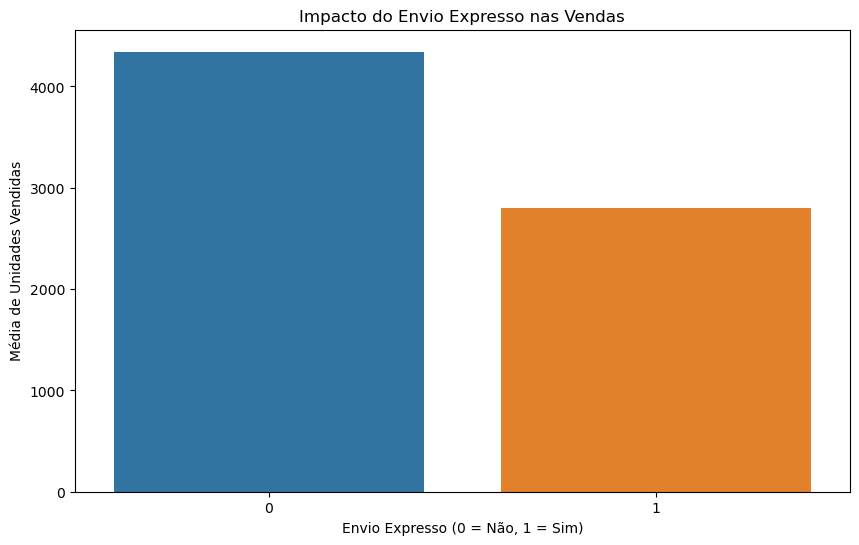

In [78]:
df_summary = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
sns.barplot(x='shipping_is_express', y='units_sold_mean', data=df_summary, errorbar=None)
plt.title('Impacto do Envio Expresso nas Vendas')
plt.xlabel('Envio Expresso (0 = Não, 1 = Sim)')
plt.ylabel('Média de Unidades Vendidas')
plt.show()